# Monte-Carlo zur Berechung der Kreisszahl $\pi$

### 1. Imports
Hier werden die notwendigen Python Module eingebunden

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2. Pseudo-Zufallszahlen Generator
Hier eine Funktion die N Zufallszahlen im Intervall [0,1] erzeuget mit hilfe eines linearen Kongruenzgenerators

In [2]:
def rng1(seed,a,b,m,N):
    random=np.zeros(N, dtype=int)
    state=seed
    for i in range(N):
        '''
        hier eine Rechnung einfügen
        state= 
        '''
        random[i]=state
    return random/m

hier die Parameter für den Generator

In [3]:
N=int(1000)
a=int(1103515245)
b=int(12345)
m=int(2**31)

Schließlich wird der Generator aufgerufen und es werden N Zufallszahlen erzeugt die in dem Array "numbers" stehen. Allternativ kann man auch den Generator aus numpy.random.rand benutzen, der mit dem Python Modul numpy kommt. 

In [4]:
numbers=rng1(13,a,b,m,N)
#numbers=np.random.rand(N)

### 3. Darstellung in 2d
Um die Zufallszahlen in 2d Darstellen zu können, teilen wir sie auf. Alle Zufallszahlen mit geradem Indizes stellen eine x-Koordinate dar, die Zufallszahlen mit ungeraden Indizes sind die y-Koordinaten. So werden aus den N Zufallszahlen N/2 Punkte in der Ebenen,

In [5]:
x=numbers[0::2]
y=numbers[1::2]

Hier sortieren wir die Punkte, bzw. Koordinaten, in Punkte die innerhalb des Keises liegen und Punkte die ausserhalb liegen. 

In [6]:
x_in=np.array([])
y_in=np.array([])
x_out=np.array([])
y_out=np.array([])

for i in range(N//2):
    if ('''hier fehlt eine Bedingung'''):
        x_in=np.append(x_in,x[i])
        y_in=np.append(y_in,y[i])
    else: 
        x_out=np.append(x_out,x[i])
        y_out=np.append(y_out,y[i])
    

Jetzt benutzen wir das Modul matplotlib um ein Bild zu malen. 

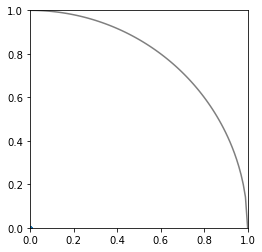

In [7]:
x_circle=np.linspace(0,1,100)
y_circle=np.sqrt(1-x_circle**2)
plt.plot(x_in,y_in,"C0.")
plt.plot(x_out,y_out,"C1.")
plt.plot(x_circle,y_circle,'C7-')
plt.xlim(0,1)
plt.ylim(0,1)
plt.gca().set_aspect('equal')
plt.show()

### 4. Abschätzung von $\pi$
Aus den obigen N Zuallszahlen herhallten wir die Abschätzung für $\pi$ wie folgt:

In [8]:
pi_approx = 4*len(x_in)/(len(x_in)+len(x_out))
print(pi_approx)

4.0


Jezt wollen wir noch herrausfinden wie sich der Fehler verhällt, wenn wir die N immer größer machen.

In [9]:
Size=np.array([])
Mean=np.array([])
Error=np.array([])
print("{:5s} {:10s} {:10s}".format("N", "mean", "std"))
for N in [int(1e4), int(1e5), int(1e6), int(1e7)]:
    pi_sample=np.array([])
    for Wiederholungen in range(100):
        numbers=np.random.rand(N)
        x=numbers[0::2]
        y=numbers[1::2]
        r=x**2+y**2
        r=np.where(r<1,1,0)
        count=np.sum(r)
        pi_sample=np.append(pi_sample, 4*count/(N/2))
    M=np.mean(pi_sample)
    E=np.std(pi_sample)
    Size=np.append(Size,N)
    Mean=np.append(Mean,M)
    Error=np.append(Error,E)
    print("{:5.0e} {:10.8f} {:10.8f}".format(N, M, E))

N     mean       std       
1e+04 3.14266400 0.02518388
1e+05 3.14203440 0.00742860
1e+06 3.14184392 0.00232390
1e+07 3.14152870 0.00078651


Das folgende Bild zeigt den Fehler als Funktion der Stichpropbengröße N. Man sieht das er wie $1/\sqrt{N}$ abfällt.

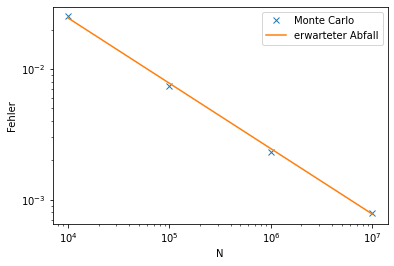

In [10]:
plt.plot(Size,Error,'x', label='Monte Carlo')
plt.plot([1e4, 1e4*1000],[0.02452,0.02452/np.sqrt(1000)], label='erwarteter Abfall')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Fehler')
plt.legend()
plt.show()